In [153]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = "data/mouse_drug_data.csv"
clinic_data = "data/clinicaltrial_data.csv"
mousedf = pd.read_csv(mouse_data)
clinicdf = pd.read_csv(clinic_data)

# Combine the data into a single dataset
combine_data = clinicdf.merge(mousedf, on="Mouse ID", how="outer")


# Display the data table for preview
combine_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [154]:
from stats import mean, median, mode, multi_mode
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_data_grp = combine_data.groupby(["Drug", "Timepoint"])
mean_tumor_response = combine_data_grp["Tumor Volume (mm3)"].mean()
mean_tumor_response.head()
# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor_response)
# Preview DataFrame
print(tumor_df)

                     Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [155]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_response = combine_data_grp["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
se_tumor_df = pd.DataFrame(se_tumor_response)
# Preview DataFrame
print(se_tumor_df)


                     Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [156]:
tumor_df  = tumor_df.reset_index()

In [157]:
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [158]:
se_tumor_df = se_tumor_df.reset_index()

In [159]:
se_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [160]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = tumor_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
se_tumor_vol = se_tumor_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
mean_tumor_vol.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [161]:
se_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [162]:
mean_tumor_vol.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

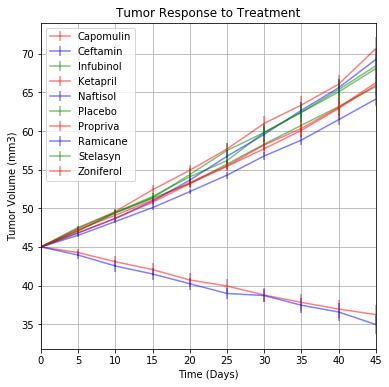

In [234]:
from matplotlib import pyplot as plt
# Generate the Plot (with Error Bars) # Capomulin Ramicane Zoniferol
mean_tumor_vol.plot(kind='line', yerr = se_tumor_vol , grid=True, subplots=False, figsize=(6,6), color=['r','b','g'], alpha=0.5)
plt.legend()
plt.title("Tumor Response to Treatment")
# Set the x-axis label
plt.xlabel("Time (Days)")
# Set the y-axis label
plt.ylabel("Tumor Volume (mm3)")
# Save the Figure
plt.savefig('figure.pdf')

In [164]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [165]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_data_grp = combine_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
metastatic_response_mean = combine_data_grp["Metastatic Sites"].mean()
# Preview DataFrame
metastatic_response_mean.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [166]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatic_sites = combine_data_grp["Metastatic Sites"].sem()
# Convert to DataFrame
se_metastatic_df = pd.DataFrame(se_metastatic_sites)
# Preview DataFrame
print(se_metastatic_df)

                     Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20

In [167]:
metastatic_response_mean = metastatic_response_mean.reset_index() # save the reset to the same variable

In [168]:
se_metastatic_df = se_metastatic_df.reset_index() # save the reset to the same variable

In [169]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_sites = metastatic_response_mean.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")
se_metastatic_sites = se_metastatic_df.pivot(index="Timepoint", columns = "Drug", values="Metastatic Sites")
# Preview that Reformatting worked
metastatic_response_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


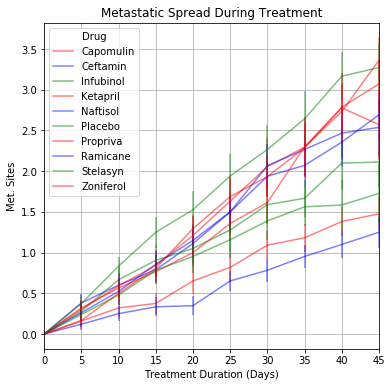

In [235]:
# Generate the Plot (with Error Bars)
metastatic_response_sites.plot(kind='line', yerr = se_metastatic_sites , grid=True, subplots=False, figsize=(6,6), color=['r','b','g'], alpha=0.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# Save the Figure
plt.savefig('figure1.pdf')
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [182]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
combine_data_sample = combine_data.groupby(["Drug", "Timepoint"]).count()
# Convert to DataFrame
survival_rate_count = pd.DataFrame(combine_data_sample)
# Preview DataFrame
survival_rate_count.head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [185]:
survival_rate_count = survival_rate_count.reset_index()
mouse = survival_rate_count["Mouse ID"]

In [186]:
survival_rate_count.head()

,index,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,0,Capomulin,0,25,25,25
1,1,Capomulin,5,25,25,25
2,2,Capomulin,10,25,25,25
3,3,Capomulin,15,24,24,24
4,4,Capomulin,20,23,23,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [188]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_survived = survival_rate_count.pivot(index="Timepoint", columns = "Drug", values = "Mouse ID")
# Preview that Reformatting worked
mouse_count_survived.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


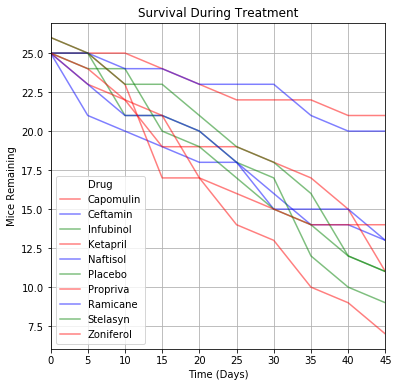

In [236]:
# Generate the Plot (Accounting for percentages)
mouse_count_survived.plot(kind='line' , grid=True, subplots=False, figsize=(6,6), color=['r','b','g'], alpha=0.5)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Mice Remaining")
# Save the Figure
plt.savefig('figure2.pdf')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [228]:
# Calculate the percent changes for each drug
initial_change = mean_tumor_vol.iloc[0]
final_change = mean_tumor_vol.iloc[-1]
percentage_change = (final_change - initial_change) / initial_change * 100
# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

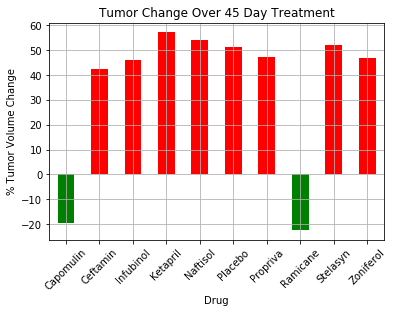

In [251]:
# Store all Relevant Percent Changes into a Tuple
mytuple = (percentage_change["Capomulin"], percentage_change["Infubinol"], percentage_change["Ketapril"], percentage_change["Placebo"])

# Splice the data between passing and failing drugs
percentage_change

# Orient widths. Add labels, tick marks, etc. 
bar = percentage_change.plot(kind='bar', rot=45, color=(percentage_change > 0).map({True: 'r',
                                                    False: 'g'}))
plt.grid(True)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig('figure3.pdf')

# Show the Figure

![Metastatic Spread During Treatment](../Images/change.png)